# **Desafio Data Analitycs**


O desafio é o seguinte: 

Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro. 

Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.

Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes.

Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.

Tendo isso em mente, estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.

Obs: O modelo de previsão pode ser o que você julgue ser o melhor, mas atenção aos detalhes de variação nas vendas!

In [86]:
# Utilizei o google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
# Importar bibliotecas e o arquivo csv direto da nuvem no Google Drive
import pandas as pd
series = pd.read_csv('/content/drive/MyDrive/FREXCO_desafio/Dados.csv', header=0, index_col=0, parse_dates=True, dayfirst=True)

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [139]:
# Criar dataframe
vendas_df = pd.DataFrame(series)

In [140]:
# Visualizar o dataframe
print(vendas_df)

            Vendas
Data              
2022-12-06     870
2022-12-07     868
2022-12-08    1189
2022-12-09     742
2022-12-10     317
2022-12-11     685
2022-12-12    1366
2022-12-13    1213
2022-12-14    1055
2022-12-15    1343
2022-12-16     832
2022-12-17     240
2022-12-18     235
2022-12-19    1050
2022-12-20     711
2022-12-21     745
2022-12-22    1009
2022-12-23      18
2022-12-24      40
2022-12-25      67
2022-12-26     821
2022-12-27     572
2022-12-28     429
2022-12-29     638
2022-12-30     106
2022-12-31      54
2023-01-01     144
2023-01-02     814
2023-01-03     679
2023-01-04     712
2023-01-05    1229
2023-01-06     821
2023-01-07     319
2023-01-08     317
2023-01-09    1317
2023-01-10     807
2023-01-11     923
2023-01-12    1265
2023-01-13     892
2023-01-14     289
2023-01-15     566
2023-01-16    1692
2023-01-17    1097
2023-01-18    1302
2023-01-19    1405
2023-01-20     945


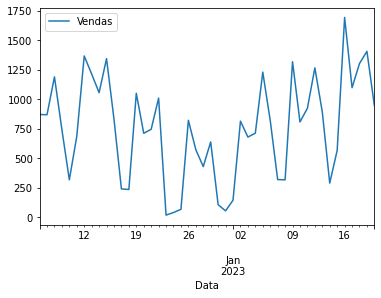

In [141]:
# Visualização gráfica do dataframe com as vendas entre os dias 06-12-2022 e 20-01-2023
vendas_df.plot();

In [142]:
# Treinar modelo ARIMA
model = ARIMA(vendas_df["Vendas"], order=(2, 1, 2))
model_fit = model.fit(disp=0)

In [152]:
# Fazer previsão de demanda para os próximos 5 dias
forecasting = model_fit.forecast(steps=5)[0]
print(forecasting)

[ 969.86132533 1072.80039812 1029.69074976 1066.20657695 1050.32574403]


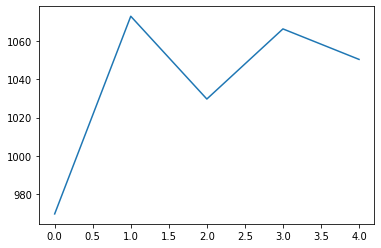

In [153]:
# Visualização gráfica da previsão para os 5 dias
plt.plot(forecasting);